In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("admissions.csv")

# Exploratory Analysis

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


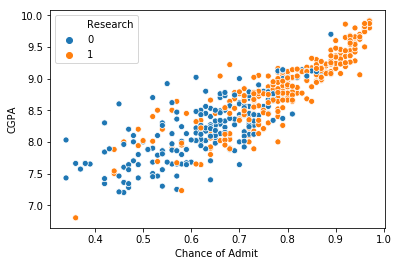

In [6]:
sns.scatterplot(x="Chance of Admit ",y="CGPA",hue="Research",data=data)

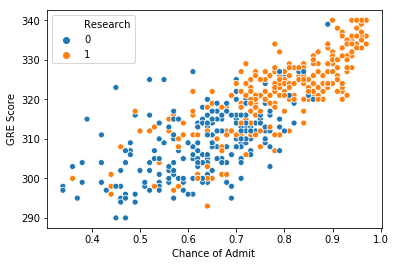

In [7]:
sns.scatterplot(x="Chance of Admit ",y="GRE Score",hue="Research",data=data)

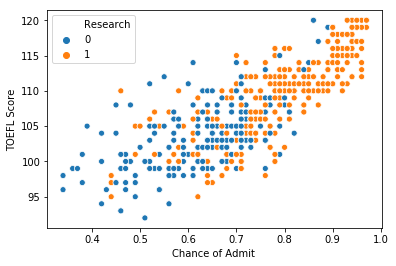

In [8]:
sns.scatterplot(x="Chance of Admit ",y="TOEFL Score",hue="Research",data=data)

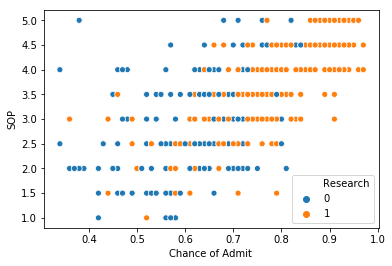

In [9]:
sns.scatterplot(x="Chance of Admit ",y="SOP",hue="Research",data=data)

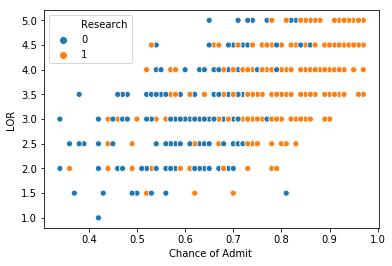

In [10]:
sns.scatterplot(x="Chance of Admit ",y="LOR ",hue="Research",data=data)

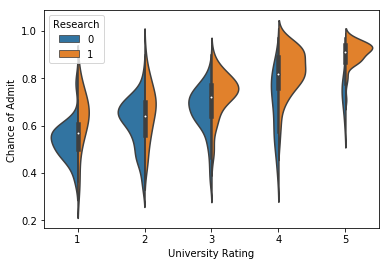

In [11]:
sns.violinplot(x="University Rating",y="Chance of Admit ",hue="Research",split=True,data=data,scale="count")

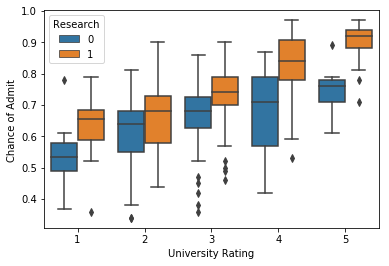

In [12]:
sns.boxplot(x="University Rating",y="Chance of Admit ",hue="Research",data=data)

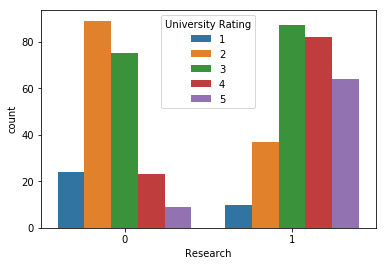

In [13]:
sns.countplot(hue="University Rating",x="Research",data=data)

# Training Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
regressor=RandomForestRegressor()

In [16]:
#X=data.drop(columns=["SOP","LOR "]).iloc[:,1:6].values
X=data.iloc[:,1:-1].values

In [17]:
y=data.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [20]:
regressor.fit(X_train,y_train)

/usr/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import r2_score

In [22]:
y_pred=regressor.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.7745572903389214

In [24]:
from sklearn.linear_model import LinearRegression
reg2=LinearRegression()

In [25]:
reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
yp2=reg2.predict(X_test)

In [27]:
r2_score(y_test,yp2)

0.8136511545271751

In [81]:
from sklearn.linear_model import TheilSenRegressor

In [82]:
reg3=TheilSenRegressor()

In [83]:
reg3.fit(X_train,y_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [84]:
yp3=reg3.predict(X_test)

In [85]:
r2_score(y_test,yp3)

0.8165773311855609

I guess linear regression works better because the data is hightly linear, as seen in the plots above, with few outliers. The research has a lot of weight, and so do CGPA and TOEFL scores.
I decided to let SOP and LOR stay in even though none affects the Chance by much.